<a href="https://colab.research.google.com/github/HEMA804/HEMA804/blob/main/Copy_of_NM_AI_per_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import pandas as pd
fake=pd.read_csv("/content/drive/MyDrive/NM/Fake.csv")
true=pd.read_csv("/content/drive/MyDrive/NM/True.csv")

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
fake.shape

(23481, 4)

In [229]:
true.shape

(21417, 4)

**checking null values**

In [230]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [231]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [232]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [233]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [234]:
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [235]:
#fake_df=fake.drop(['date', 'subject'], axis=1)
#true_df=true.drop(['date', 'subject'], axis=1)


In [236]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [237]:
fake["label"]=0
true["label"]=1

In [238]:
df= pd.concat([fake,true], axis=0)

In [239]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [240]:
df= df.sample(frac = 1).reset_index()
df.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [241]:
df.shape

(44898, 6)

In [242]:
df.head()

,index,title,text,subject,date,label
0,5264,South Carolina Republican's town hall starts r...,"NORTH CHARLESTON, S.C. (Reuters) - U.S. Senato...",politicsNews,"February 25, 2017",1
1,18046,Erdogan says Turkey working with Syria rebels ...,ANKARA (Reuters) - President Tayyip Erdogan sa...,worldnews,"October 8, 2017",1
2,19287,BREAKING: CLOSE FRIEND Of Bill And Hillary Cli...,The man arrested by Miami Beach police Tuesday...,left-news,"Jan 19, 2017",0
3,20873,Fourteen people rescued from seaside tower in ...,LONDON (Reuters) - Fourteen people had to be a...,worldnews,"September 6, 2017",1
4,18959,Philippines' Duterte wants U.S. help in fighti...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 26, 2017",1


Analysis

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    44898 non-null  int64 
 1   title    44898 non-null  object
 2   text     44898 non-null  object
 3   subject  44898 non-null  object
 4   date     44898 non-null  object
 5   label    44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [244]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

,index,title,text,subject,date,label,original
0,5264,South Carolina Republican's town hall starts r...,"NORTH CHARLESTON, S.C. (Reuters) - U.S. Senato...",politicsNews,"February 25, 2017",1,South Carolina Republican's town hall starts r...
1,18046,Erdogan says Turkey working with Syria rebels ...,ANKARA (Reuters) - President Tayyip Erdogan sa...,worldnews,"October 8, 2017",1,Erdogan says Turkey working with Syria rebels ...
2,19287,BREAKING: CLOSE FRIEND Of Bill And Hillary Cli...,The man arrested by Miami Beach police Tuesday...,left-news,"Jan 19, 2017",0,BREAKING: CLOSE FRIEND Of Bill And Hillary Cli...
3,20873,Fourteen people rescued from seaside tower in ...,LONDON (Reuters) - Fourteen people had to be a...,worldnews,"September 6, 2017",1,Fourteen people rescued from seaside tower in ...
4,18959,Philippines' Duterte wants U.S. help in fighti...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 26, 2017",1,Philippines' Duterte wants U.S. help in fighti...


In [245]:
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [246]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [247]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [248]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [249]:
len(stop_words)

184

In [250]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

df['after_clean'] = df['original'].apply(preprocess)

In [251]:
df.original[0]

"South Carolina Republican's town hall starts rowdy, ends peaceably NORTH CHARLESTON, S.C. (Reuters) - U.S. Senator Tim Scott faced a quandary on Saturday in hosting his town hall: he promised to meet with his South Carolina constituents, but he wanted to avoid the kind of adversarial free-for-all so many Republicans encountered this week. Scott decided to ban placards from his North Charlestown meeting in hopes of averting the raucousness that erupted at dozens of town halls during the first congressional recess of Donald Trump’s month-old presidency. The senator also required the crowd submit questions in writing ahead of time after other Republican lawmakers faced a wave of anger on issues ranging from Trump’s immigration and healthcare policies to the president’s ties to Russia.  Despite Scott’s precautions, arguments broke out and constituents told one another to shut up, though many in the audience - mostly white and over the age of 50 - said the senator remained respectful and s

In [252]:
print(df.after_clean[0])

['south', 'carolina', 'republican', 'town', 'hall', 'starts', 'rowdy', 'ends', 'peaceably', 'north', 'charleston', 'reuters', 'senator', 'scott', 'faced', 'quandary', 'saturday', 'hosting', 'town', 'hall', 'promised', 'meet', 'south', 'carolina', 'constituents', 'wanted', 'avoid', 'kind', 'adversarial', 'free', 'republicans', 'encountered', 'week', 'scott', 'decided', 'placards', 'north', 'charlestown', 'meeting', 'hopes', 'averting', 'raucousness', 'erupted', 'dozens', 'town', 'halls', 'congressional', 'recess', 'donald', 'trump', 'month', 'presidency', 'senator', 'required', 'crowd', 'submit', 'questions', 'writing', 'ahead', 'time', 'republican', 'lawmakers', 'faced', 'wave', 'anger', 'issues', 'ranging', 'trump', 'immigration', 'healthcare', 'policies', 'president', 'ties', 'russia', 'despite', 'scott', 'precautions', 'arguments', 'broke', 'constituents', 'told', 'shut', 'audience', 'white', 'said', 'senator', 'remained', 'respectful', 'degenerated', 'shouting', 'match', 'scott', '

In [253]:
df.head(5)

,index,title,text,subject,date,label,original,after_clean
0,5264,South Carolina Republican's town hall starts r...,"NORTH CHARLESTON, S.C. (Reuters) - U.S. Senato...",politicsNews,"February 25, 2017",1,South Carolina Republican's town hall starts r...,"[south, carolina, republican, town, hall, star..."
1,18046,Erdogan says Turkey working with Syria rebels ...,ANKARA (Reuters) - President Tayyip Erdogan sa...,worldnews,"October 8, 2017",1,Erdogan says Turkey working with Syria rebels ...,"[erdogan, says, turkey, working, syria, rebels..."
2,19287,BREAKING: CLOSE FRIEND Of Bill And Hillary Cli...,The man arrested by Miami Beach police Tuesday...,left-news,"Jan 19, 2017",0,BREAKING: CLOSE FRIEND Of Bill And Hillary Cli...,"[breaking, close, friend, hillary, clinton, hu..."
3,20873,Fourteen people rescued from seaside tower in ...,LONDON (Reuters) - Fourteen people had to be a...,worldnews,"September 6, 2017",1,Fourteen people rescued from seaside tower in ...,"[fourteen, people, rescued, seaside, tower, so..."
4,18959,Philippines' Duterte wants U.S. help in fighti...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 26, 2017",1,Philippines' Duterte wants U.S. help in fighti...,"[philippines, duterte, wants, help, fighting, ..."


In [254]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.after_clean:
    for j in i:
        list_of_words.append(j)

In [255]:
list_of_words

['south',
 'carolina',
 'republican',
 'town',
 'hall',
 'starts',
 'rowdy',
 'ends',
 'peaceably',
 'north',
 'charleston',
 'reuters',
 'senator',
 'scott',
 'faced',
 'quandary',
 'saturday',
 'hosting',
 'town',
 'hall',
 'promised',
 'meet',
 'south',
 'carolina',
 'constituents',
 'wanted',
 'avoid',
 'kind',
 'adversarial',
 'free',
 'republicans',
 'encountered',
 'week',
 'scott',
 'decided',
 'placards',
 'north',
 'charlestown',
 'meeting',
 'hopes',
 'averting',
 'raucousness',
 'erupted',
 'dozens',
 'town',
 'halls',
 'congressional',
 'recess',
 'donald',
 'trump',
 'month',
 'presidency',
 'senator',
 'required',
 'crowd',
 'submit',
 'questions',
 'writing',
 'ahead',
 'time',
 'republican',
 'lawmakers',
 'faced',
 'wave',
 'anger',
 'issues',
 'ranging',
 'trump',
 'immigration',
 'healthcare',
 'policies',
 'president',
 'ties',
 'russia',
 'despite',
 'scott',
 'precautions',
 'arguments',
 'broke',
 'constituents',
 'told',
 'shut',
 'audience',
 'white',
 'said',

In [256]:
len(list_of_words)

9276947

In [257]:
total_words = len(list(set(list_of_words)))
total_words

108704

In [258]:
df['clean_joined'] = df['after_clean'].apply(lambda x: " ".join(x))

In [259]:
df.head(5)

,index,title,text,subject,date,label,original,after_clean,clean_joined
0,5264,South Carolina Republican's town hall starts r...,"NORTH CHARLESTON, S.C. (Reuters) - U.S. Senato...",politicsNews,"February 25, 2017",1,South Carolina Republican's town hall starts r...,"[south, carolina, republican, town, hall, star...",south carolina republican town hall starts row...
1,18046,Erdogan says Turkey working with Syria rebels ...,ANKARA (Reuters) - President Tayyip Erdogan sa...,worldnews,"October 8, 2017",1,Erdogan says Turkey working with Syria rebels ...,"[erdogan, says, turkey, working, syria, rebels...",erdogan says turkey working syria rebels imple...
2,19287,BREAKING: CLOSE FRIEND Of Bill And Hillary Cli...,The man arrested by Miami Beach police Tuesday...,left-news,"Jan 19, 2017",0,BREAKING: CLOSE FRIEND Of Bill And Hillary Cli...,"[breaking, close, friend, hillary, clinton, hu...",breaking close friend hillary clinton huge dem...
3,20873,Fourteen people rescued from seaside tower in ...,LONDON (Reuters) - Fourteen people had to be a...,worldnews,"September 6, 2017",1,Fourteen people rescued from seaside tower in ...,"[fourteen, people, rescued, seaside, tower, so...",fourteen people rescued seaside tower southern...
4,18959,Philippines' Duterte wants U.S. help in fighti...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 26, 2017",1,Philippines' Duterte wants U.S. help in fighti...,"[philippines, duterte, wants, help, fighting, ...",philippines duterte wants help fighting drugs ...


In [260]:
df['clean_joined'][0]

'south carolina republican town hall starts rowdy ends peaceably north charleston reuters senator scott faced quandary saturday hosting town hall promised meet south carolina constituents wanted avoid kind adversarial free republicans encountered week scott decided placards north charlestown meeting hopes averting raucousness erupted dozens town halls congressional recess donald trump month presidency senator required crowd submit questions writing ahead time republican lawmakers faced wave anger issues ranging trump immigration healthcare policies president ties russia despite scott precautions arguments broke constituents told shut audience white said senator remained respectful degenerated shouting match scott african american republican senate began town hall pulling slips paper reading questions aloud overflow audience evenly divided trump opponents supporters reacted loud boos cheers begin answer question rise hate crimes scott said trend predates president campaign blame trump t

**visualization**

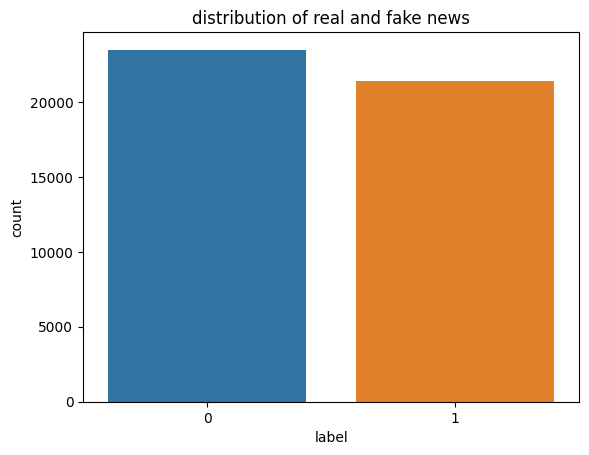

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df["label"])
plt.title('distribution of real and fake news')
plt.show()

Text(0.5, 1.0, 'distribution of subjects')

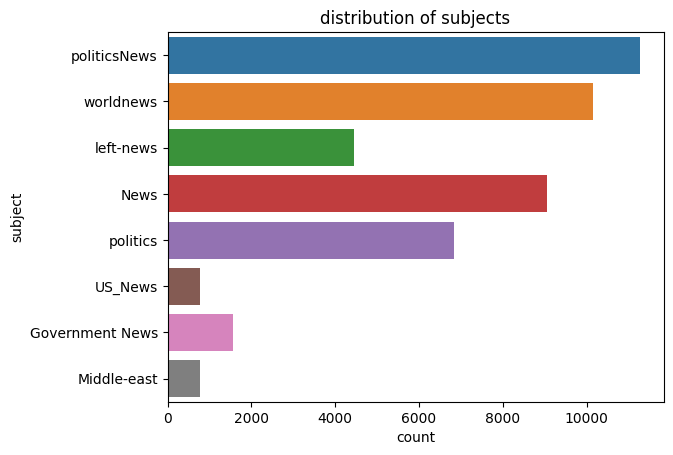

In [262]:
sns.countplot(y = df['subject'])
plt.title("distribution of subjects")

for Fake News

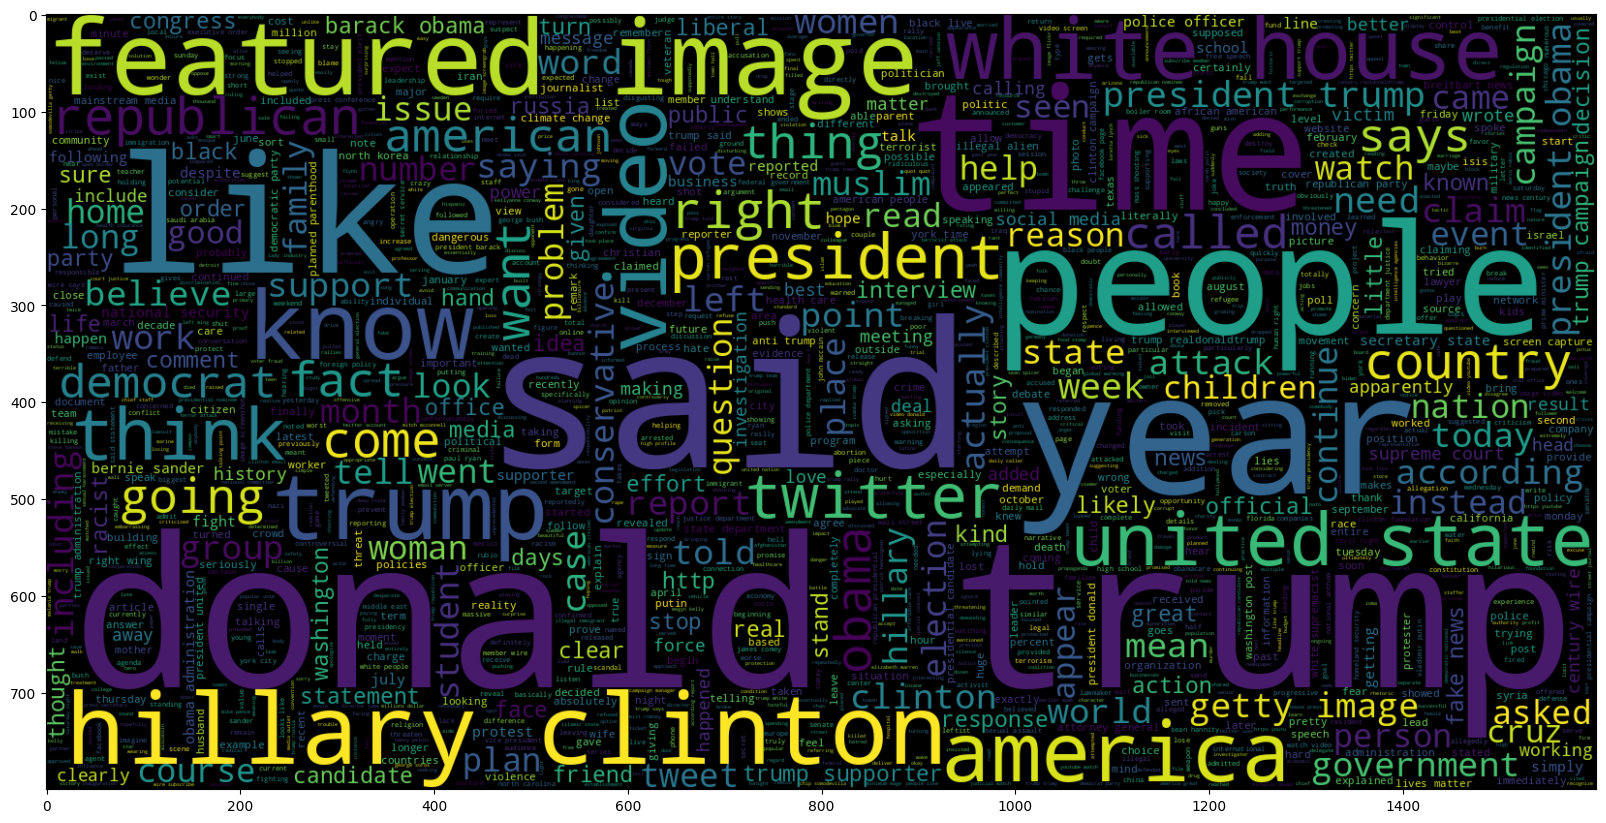

In [263]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

for True News

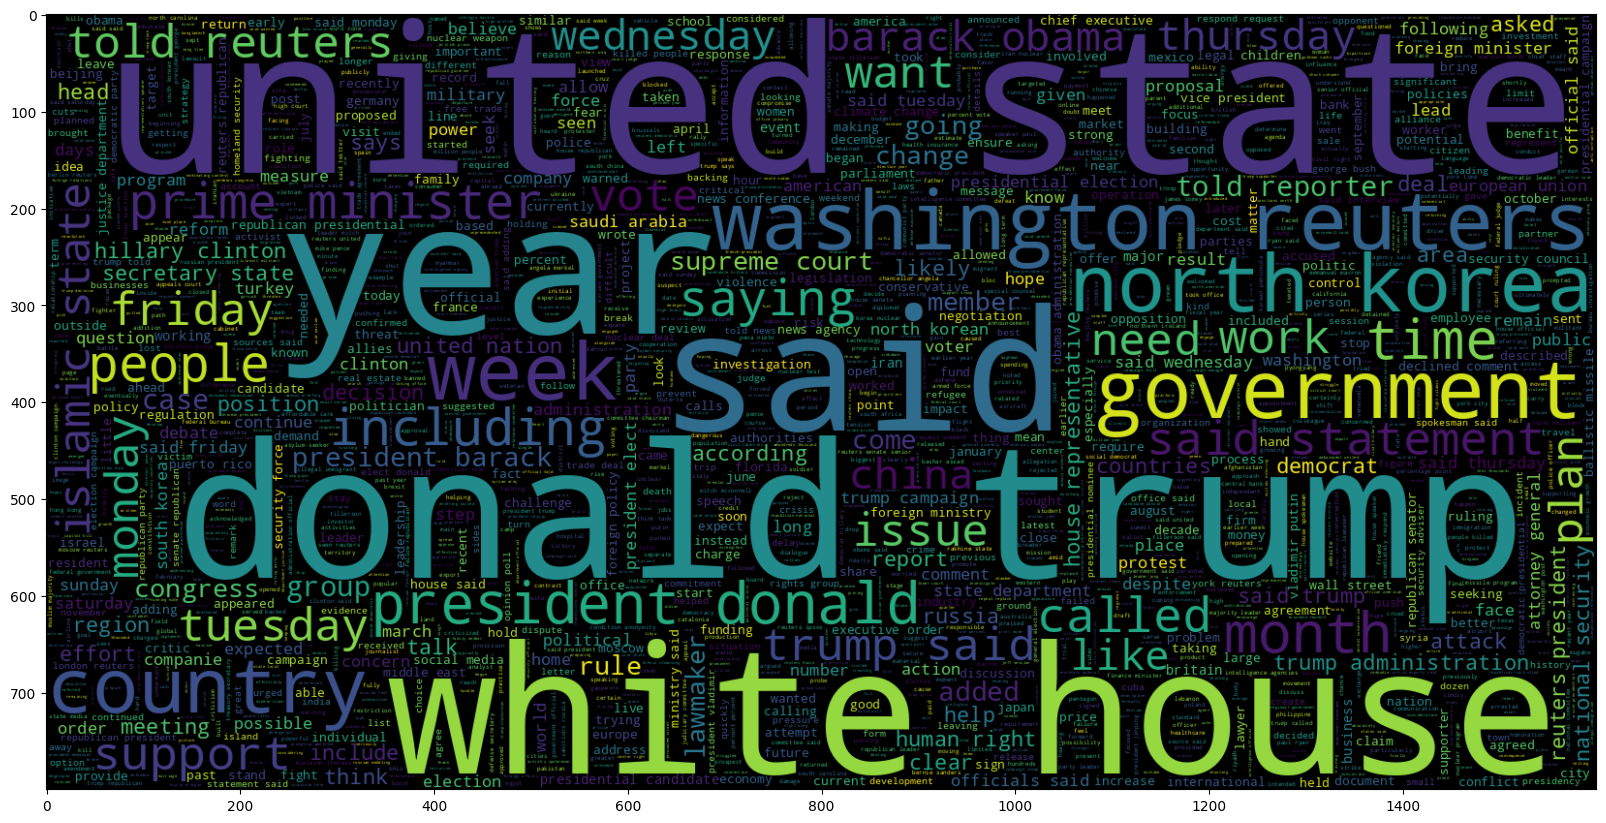

In [264]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [265]:
import nltk
nltk.download("punkt")
nltk.word_tokenize(df['clean_joined'][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['south',
 'carolina',
 'republican',
 'town',
 'hall',
 'starts',
 'rowdy',
 'ends',
 'peaceably',
 'north',
 'charleston',
 'reuters',
 'senator',
 'scott',
 'faced',
 'quandary',
 'saturday',
 'hosting',
 'town',
 'hall',
 'promised',
 'meet',
 'south',
 'carolina',
 'constituents',
 'wanted',
 'avoid',
 'kind',
 'adversarial',
 'free',
 'republicans',
 'encountered',
 'week',
 'scott',
 'decided',
 'placards',
 'north',
 'charlestown',
 'meeting',
 'hopes',
 'averting',
 'raucousness',
 'erupted',
 'dozens',
 'town',
 'halls',
 'congressional',
 'recess',
 'donald',
 'trump',
 'month',
 'presidency',
 'senator',
 'required',
 'crowd',
 'submit',
 'questions',
 'writing',
 'ahead',
 'time',
 'republican',
 'lawmakers',
 'faced',
 'wave',
 'anger',
 'issues',
 'ranging',
 'trump',
 'immigration',
 'healthcare',
 'policies',
 'president',
 'ties',
 'russia',
 'despite',
 'scott',
 'precautions',
 'arguments',
 'broke',
 'constituents',
 'told',
 'shut',
 'audience',
 'white',
 'said',

In [266]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [ ]:
# visualize the distribution of number of words in a text
import plotly.express as px #interactive visualizations
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.label, test_size = 0.2)

In [ ]:
from nltk import word_tokenize

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
len(train_sequences)

In [ ]:
len(test_sequences)

In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

In [ ]:
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 10)


In [ ]:
pred = model.predict(padded_test)

In [ ]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)